

# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [1]:
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
import requests, requests_cache
import pandas as pd
import seaborn as sns
import json
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
requests_cache.install_cache('demo_cache')
key="yCtT9prMnfCoZQwUP4MfYqPb37wTvalz3zrRnPvQ"
#make sure to get rid of key after

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [3]:
def ndb_search(search):
    url='https://api.nal.usda.gov/ndb/search'
    response=requests.get(url, params = {
        "q": search,
        "api_key": key,
        "format": "json",
    })
    
    
    #print response.url
    response.raise_for_status()
    test=response.json()
    return test['list']['item']
    #return test['list']['item']

ndb_search("quail eggs")

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

<p>The strategy I used below incorporated modifying the ndb_search() function that I originally created. And then I created a new function ndbnum() which I used to generate the output of the 'ndbnumber' from within the JSON extract. Within ndbnum(), I made it so that the entry was split by the '_' underscore and then the string 'raw' was added to the end. This way the ndb_search() would generate results that were more accurate. This proved to be the easiest method and involved the least amount of hardcode, aside from kiwi. Next was that I tested this out by running a for loop and returning it all within a pandas DataFrame as datalist. While not all of the entries returned are correct, the results were very accurate. There was trouble with kiwi, cabbage, and cucumber. And then finally appended this to the fresh.csv that we were given for this assignment and made a new row called 'ndbnumber'. </p>

In [4]:
def ndb_search(search,ds):
    url='https://api.nal.usda.gov/ndb/search'
    response=requests.get(url, params = {
        "q": search,
        "api_key": key,
        "format": "json",
        "ds": ds
    })
   
            
    response.raise_for_status()
    test=response.json()
    return test['list']['item']

ndb_search("cherries raw", "Standard Reference")


In [5]:
fresh=pd.read_csv("fresh.csv")
fresh.food[0]
def ndbnum(search_term):
    
    search_term=search_term.partition('_')[0]+' '+search_term.partition('_')[2] + ' raw'
    #search_term=search_term+' ,raw'    
    if search_term=='kiwi  raw':
        search_term='kiwi'
    data=ndb_search(search_term,"Standard Reference")
    for entry in fresh.iterrows():
        df= {'Food name' : data[0]["name"],'ndbnumber' : data[0]['ndbno']}       
        df=pd.DataFrame(df,index=[0])
        #df2.append(df,ignore_index=True) ## dataframe aappend
    return df
#ndbnum('watermelon')

In [6]:
datalist=pd.DataFrame()
for i in range(0,49):
    str=fresh.food[i]
    #str=str.partition('_')[0]
    hi=ndbnum(str)
    hi=pd.DataFrame(hi)
    datalist=datalist.append(hi,ignore_index=True)
datalist.head()  

,Food name,ndbnumber
0,"Watermelon, raw",09326
1,"Melons, cantaloupe, raw",09181
2,"Tangerine juice, raw",09221
3,"Strawberries, raw",09316
4,"Plums, raw",09279


In [7]:
ndbColumn=pd.DataFrame()
for i, row in fresh.iterrows():
    str1=fresh.food[i]
    hi=ndbnum(str1)
    hi=pd.DataFrame(hi)
    ndbColumn=ndbColumn.append(hi,ignore_index=True)
ndbColumn.drop_duplicates()
fresh['ndbnumber']=pd.Series(ndbColumn.ndbnumber)

In [9]:
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbnumber
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09221
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [10]:
def ndb_report(NDB):
    url='https://api.nal.usda.gov/ndb/V2/reports'
    response=requests.get(url, params = {
        "ndbno": NDB,
        "api_key": key,
        "format": "json",  
    })
    
    response.raise_for_status()
    test=response.json()
    return test['foods'][0]['food']['nutrients']
ndb_report("09279")[0]


In [11]:
ndb_report(fresh.ndbnumber[0])[8]

In [10]:
calories_info=pd.DataFrame()
for i, row in fresh.iterrows():
    measure=ndb_report(fresh.ndbnumber[i])
    calories_df = {'Calories_kCal' : measure[1]['value']}       
    calories_df=pd.DataFrame(calories_df,index=[0])
    calories_info=calories_info.append(calories_df,ignore_index=True)
calories_info
fresh['Calories_kCal']=pd.Series(calories_info.Calories_kCal)
#fresh

In [11]:
protein_info=pd.DataFrame()
for i, row in fresh.iterrows():
    measure=ndb_report(fresh.ndbnumber[i])
    protein_df = {'Protein_g' : measure[2]['value'], 'unit':measure[2]['unit']}       
    protein_df=pd.DataFrame(protein_df,index=[0])
    protein_info=protein_info.append(protein_df,ignore_index=True)
protein_info
fresh['Protein_g']=pd.Series(protein_info.Protein_g)
#fresh

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [12]:
# Convert the 'object' type to float64 or int64 so it can be plotted
fresh.head()
fresh.dtypes
fresh = fresh.convert_objects(convert_numeric=True)
#.addlegend()
#.set_axis_labels()

/Users/matthewlee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


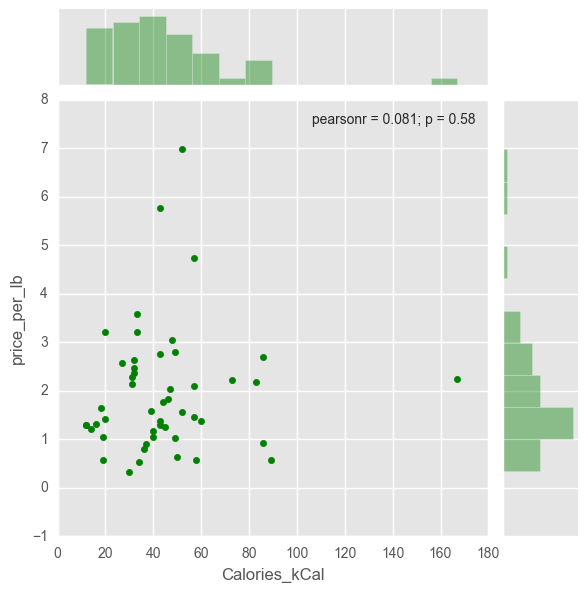

In [13]:
sns.jointplot(x='Calories_kCal',y='price_per_lb',data=fresh,color='g')
plt.show()

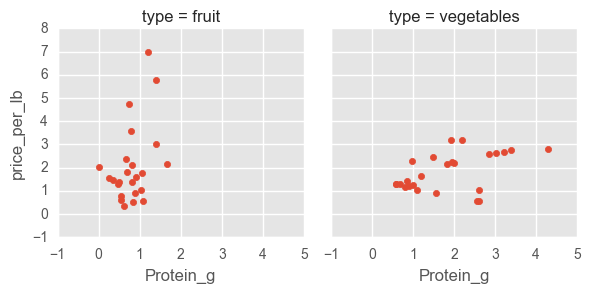

In [14]:
plot=sns.FacetGrid(data=fresh,col="type")
plot = (plot.map(plt.scatter, "Protein_g", "price_per_lb",))
plt.show()

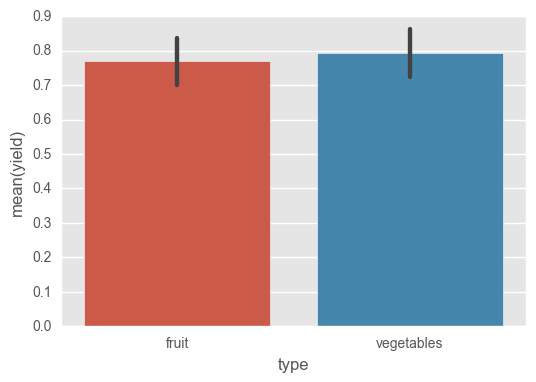

In [15]:
#barplot works for discrete vs continuous
sns.barplot(x="type",y="yield",data=fresh)
plt.show()

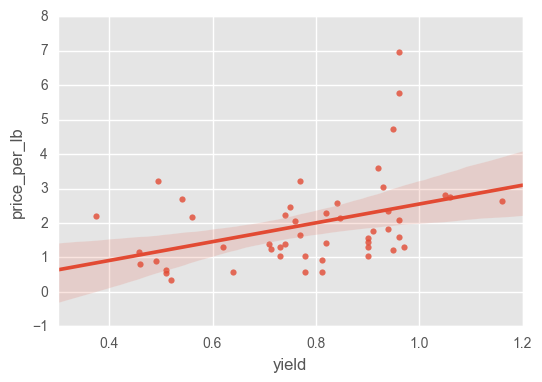

In [16]:
sns.regplot(x="yield",y="price_per_lb",data=fresh)
plt.show()

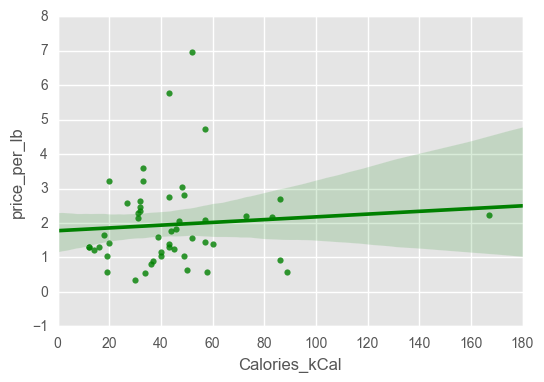

In [17]:
sns.regplot(x="Calories_kCal",y="price_per_lb",data=fresh,color='g')
plt.show()

<p> From our plots we can see that calories for all the foods have a slight positive correlation with price per pound. The reason we chose to analyze price per pound rather than price per cup was because this is the unit that is commonly used in grocery stores in the United States.  </p> <p> When we analyze protein per food item, the fruits and vegetables were split up when comparing their prices. We can see that price per pound for fruit has a wider range of prices. And for the vegetables, the protein content does not have much indication on how the vegetable is priced.</p>